<a href="https://colab.research.google.com/github/tsholofelo-mokheleli/ACIS-2023-New-Zealand/blob/main/CV%20Dimensionality%20Reduction%2021H20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Dimensionality Reduction in Machine Learning**

### **Import Libraries**

In [24]:
# Load the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np
import seaborn as sns

# Scaler
from sklearn.preprocessing import StandardScaler

# Dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Warning filter
import warnings
warnings.filterwarnings('ignore')
cmap=sns.color_palette('Blues_r')

# Metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, cohen_kappa_score, confusion_matrix, balanced_accuracy_score
from imblearn.metrics import geometric_mean_score

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

# Ensemble Method
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier

# Hyper-parameter tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# Cross Validation
from sklearn.model_selection import cross_val_score, KFold

# Plot Theme
sns.set_style("darkgrid")
plt.style.use("seaborn-deep")

### **Load the data**

In [25]:
data = pd.read_csv("Diabetes Multi-Class.csv", sep=';', on_bad_lines='skip')

In [26]:
data.head()

,Patient,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,2,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,3,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,4,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,5,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [27]:
data.shape

(10000, 23)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Patient               10000 non-null  int64  
 1   Diabetes_012          10000 non-null  float64
 2   HighBP                10000 non-null  float64
 3   HighChol              10000 non-null  float64
 4   CholCheck             10000 non-null  float64
 5   BMI                   10000 non-null  float64
 6   Smoker                10000 non-null  float64
 7   Stroke                10000 non-null  float64
 8   HeartDiseaseorAttack  10000 non-null  float64
 9   PhysActivity          10000 non-null  float64
 10  Fruits                10000 non-null  float64
 11  Veggies               10000 non-null  float64
 12  HvyAlcoholConsump     10000 non-null  float64
 13  AnyHealthcare         10000 non-null  float64
 14  NoDocbcCost           10000 non-null  float64
 15  GenHlth             

**Drop null from target var, and Convert data to Float**

In [29]:
data = data.drop(["Patient"], axis=1)
data = data.dropna()
data.rename(columns={"Diabetes_012": "Diabetes"}, inplace=True)

# Convert all columns to int data type
for column in data.columns:
    data[column] = data[column].astype('float')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes              10000 non-null  float64
 1   HighBP                10000 non-null  float64
 2   HighChol              10000 non-null  float64
 3   CholCheck             10000 non-null  float64
 4   BMI                   10000 non-null  float64
 5   Smoker                10000 non-null  float64
 6   Stroke                10000 non-null  float64
 7   HeartDiseaseorAttack  10000 non-null  float64
 8   PhysActivity          10000 non-null  float64
 9   Fruits                10000 non-null  float64
 10  Veggies               10000 non-null  float64
 11  HvyAlcoholConsump     10000 non-null  float64
 12  AnyHealthcare         10000 non-null  float64
 13  NoDocbcCost           10000 non-null  float64
 14  GenHlth               10000 non-null  float64
 15  MentHlth            

### **Class Distribution**

**Explore the class distribution**

In [30]:
class_counts = data['Diabetes'].value_counts()
print(class_counts)

0.0    8216
2.0    1606
1.0     178
Name: Diabetes, dtype: int64


**Visualize the class distribution**

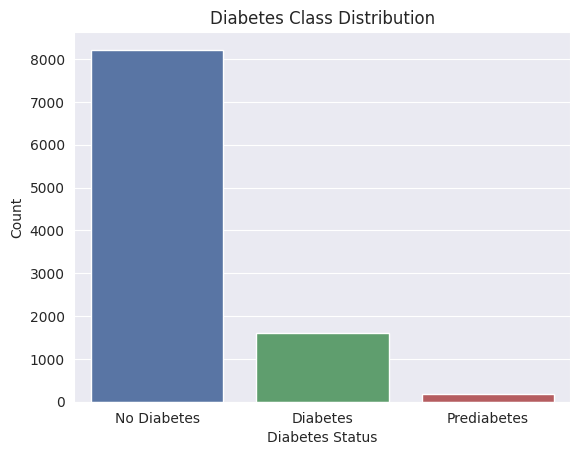

In [31]:
# Create a copy of the original dataset
new_data = data.copy()

mh_mapping = {0.0: 'No Diabetes', 1.0: 'Prediabetes', 2.0: 'Diabetes'}
new_data['dhi_label'] = new_data['Diabetes'].map(mh_mapping)

# Plot the distribution based on the new dataset
sns.countplot(data=new_data, x='dhi_label')
plt.xlabel('Diabetes Status')
plt.ylabel('Count')
plt.title('Diabetes Class Distribution')
plt.show()

### **Standardizing**

In [32]:
data_x = data.drop(["Diabetes"], axis=1)
data_y = data['Diabetes']

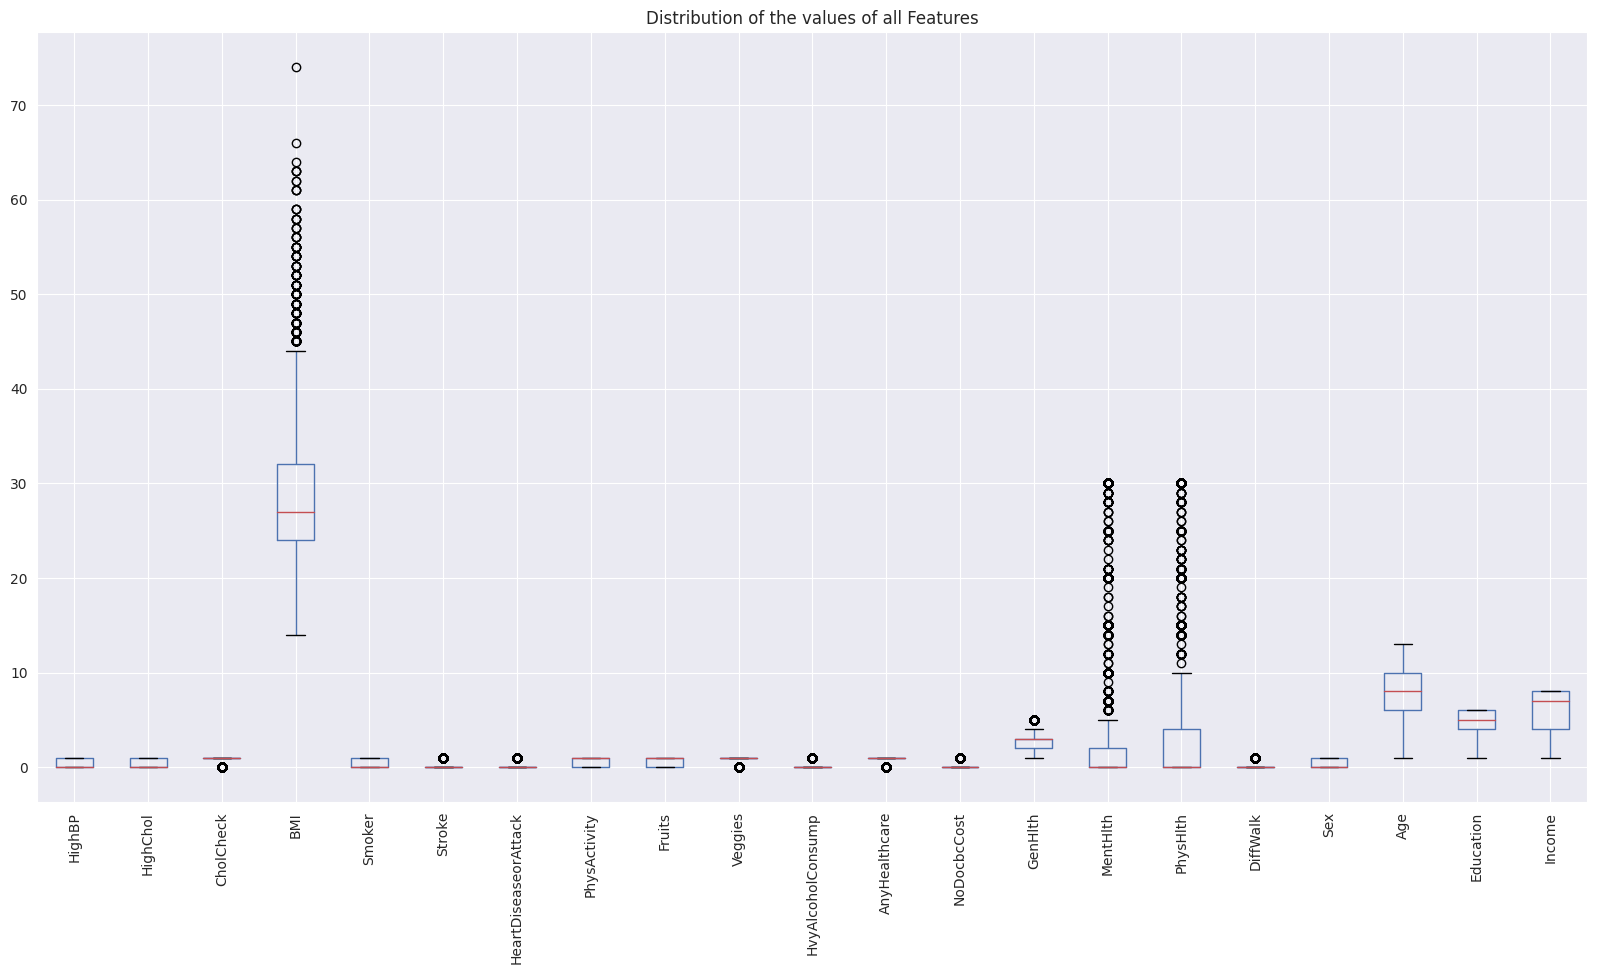

In [33]:
plt.figure(figsize=(20,10))
data_x.boxplot()
plt.xticks(rotation=90)
plt.title("Distribution of the values ​​of all Features")
plt.show()

**Standardize the feature columns**

In [34]:
scaler = StandardScaler()
standardized_features = scaler.fit_transform(data_x)

# Convert the standardized features back to a DataFrame
std_data = pd.DataFrame(standardized_features, columns=data_x.columns)

In [35]:
std_data.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.078036,1.106883,0.200913,1.804549,1.102643,-0.221828,-0.335182,-1.701646,-1.235011,0.494682,...,0.253317,-0.346514,2.174080,1.844705,1.113405,2.027924,-0.846952,0.295347,-1.012157,-1.372912
1,-0.927613,-0.903438,-4.977268,-0.564994,1.102643,-0.221828,-0.335182,0.587666,-1.235011,-2.021502,...,-3.947626,2.885890,0.362875,-0.450228,-0.519345,-0.493115,-0.846952,-0.372028,0.999484,-2.313455
2,1.078036,1.106883,0.200913,-0.091085,-0.906912,-0.221828,-0.335182,-1.701646,0.809709,-2.021502,...,0.253317,2.885890,2.174080,3.374660,2.746156,2.027924,-0.846952,0.295347,-1.012157,0.978448
3,1.078036,-0.903438,0.200913,-0.249055,-0.906912,-0.221828,-0.335182,0.587666,0.809709,0.494682,...,0.253317,-0.346514,-0.542728,-0.450228,-0.519345,-0.493115,-0.846952,0.962722,-2.017977,0.037904
4,1.078036,1.106883,0.200913,-0.722963,-0.906912,-0.221828,-0.335182,0.587666,0.809709,0.494682,...,0.253317,-0.346514,-0.542728,-0.067739,-0.519345,-0.493115,-0.846952,0.962722,-0.006337,-0.902640


**Marge the data back**

In [36]:
# Concatenate the standardized features with the target column
std_df = pd.concat([std_data, data_y], axis=1)

In [37]:
std_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HighBP                10000 non-null  float64
 1   HighChol              10000 non-null  float64
 2   CholCheck             10000 non-null  float64
 3   BMI                   10000 non-null  float64
 4   Smoker                10000 non-null  float64
 5   Stroke                10000 non-null  float64
 6   HeartDiseaseorAttack  10000 non-null  float64
 7   PhysActivity          10000 non-null  float64
 8   Fruits                10000 non-null  float64
 9   Veggies               10000 non-null  float64
 10  HvyAlcoholConsump     10000 non-null  float64
 11  AnyHealthcare         10000 non-null  float64
 12  NoDocbcCost           10000 non-null  float64
 13  GenHlth               10000 non-null  float64
 14  MentHlth              10000 non-null  float64
 15  PhysHlth            

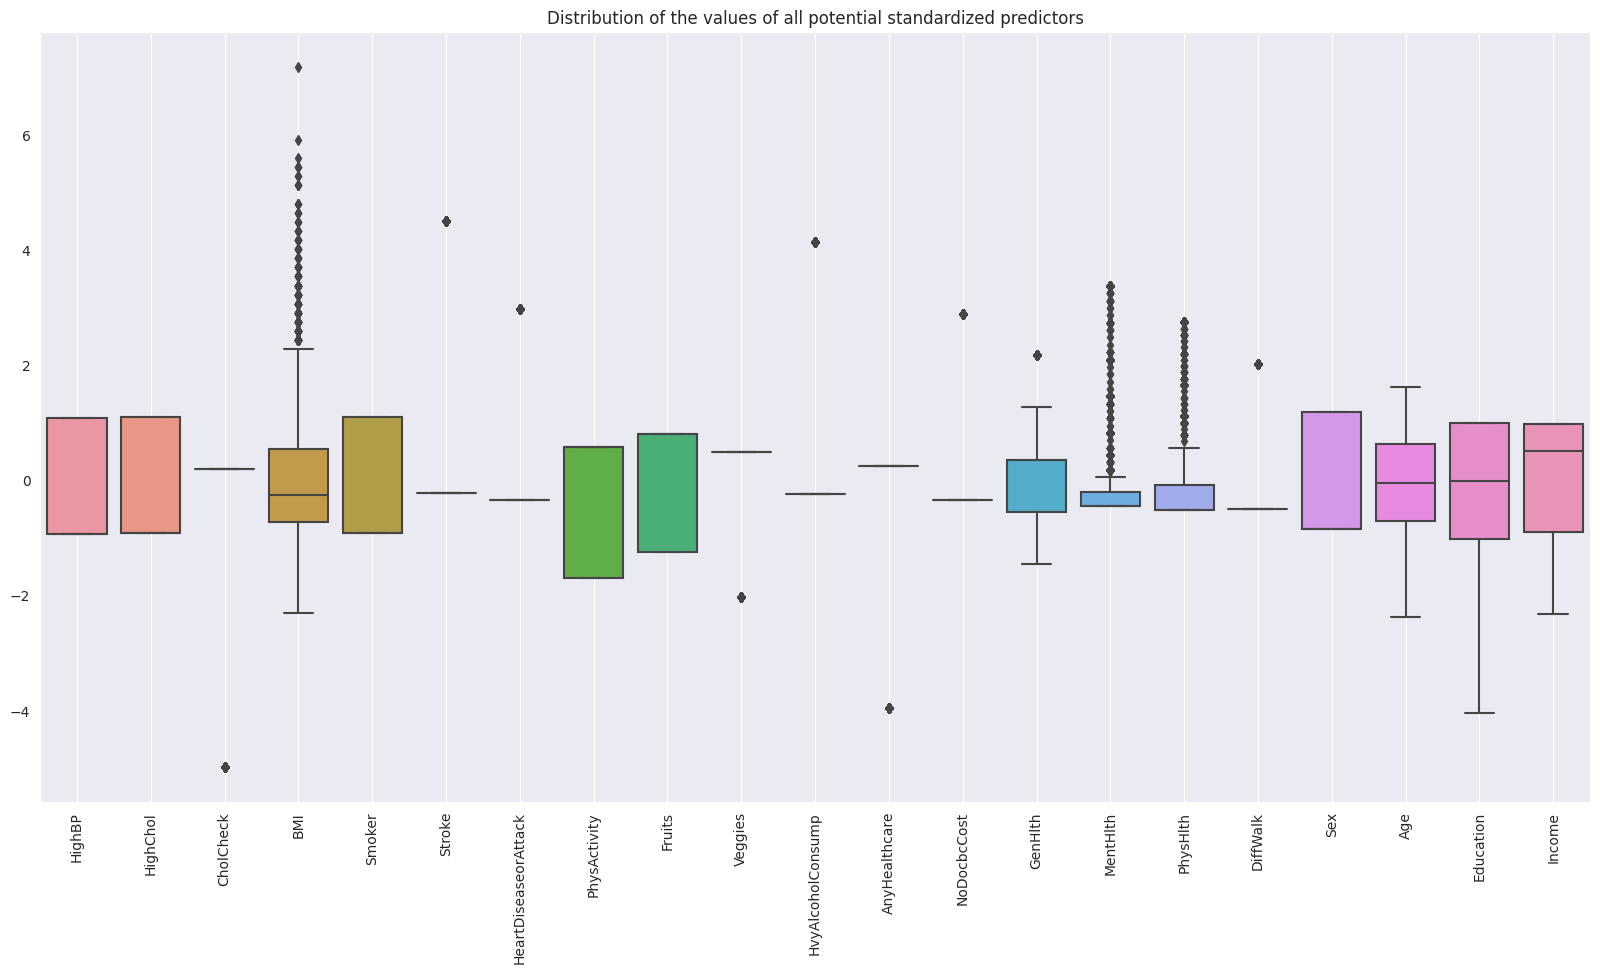

In [38]:
plt.figure(figsize=(20,10))
sea.boxplot(data=std_df.iloc[:,:-1]) # except the target
plt.xticks(rotation=90)
plt.title("Distribution of the values ​​of all potential standardized predictors")
plt.grid()
plt.show()

###**Correlation**

Text(0.5, 1.0, 'Correlation Heatmap')

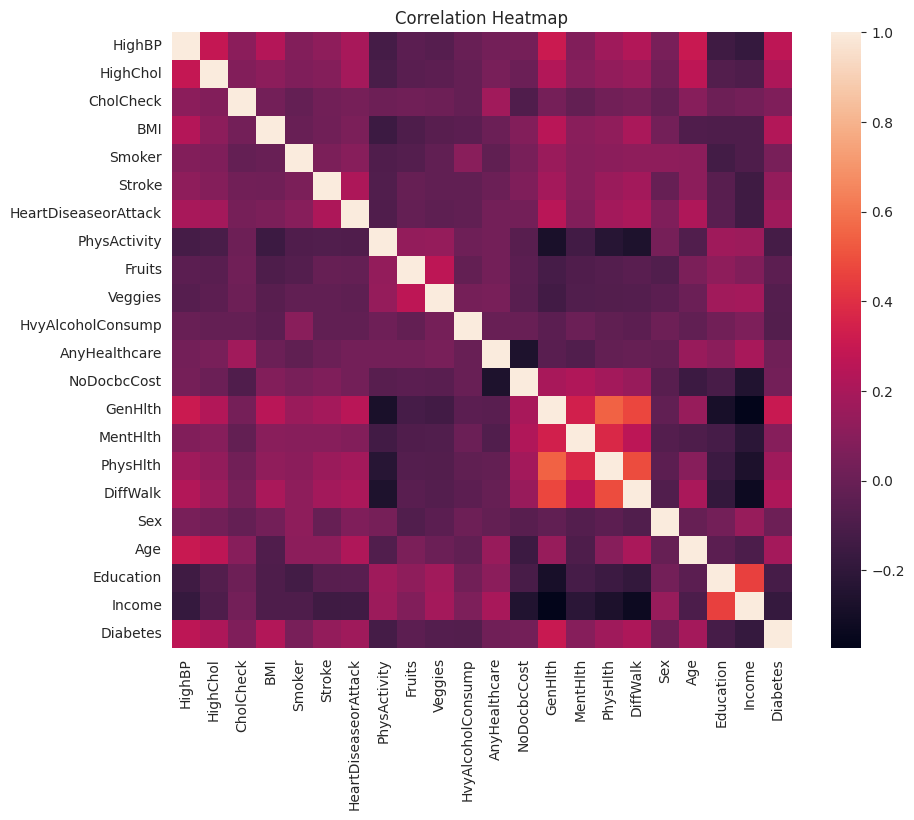

In [39]:
# Calculate the correlation matrix
correlation_matrix = std_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False).set_title('Correlation Heatmap')

### **Dimensionality Reduction**

**Split Dataset**

In [40]:
X = std_df.drop(["Diabetes"], axis=1)
y = std_df['Diabetes']

# Set the number of folds for cross-validation
num_folds = 5

# Create a cross-validation object (KFold)
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

### **Define Classifiers**

In [41]:
# Define a list of classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(),
}

classifiers_pca = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(),
}

classifiers_lda = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(),
}

### **Baseline model**

In [42]:
# Dictionary to store evaluation metrics
results = {}

# Loop through each classifier
for name, clf in classifiers.items():
    cv_scores = cross_val_score(clf, X, y, cv=kfold, scoring='accuracy')

    # Calculate the mean and standard deviation of the cross-validation scores
    mean_cv_score = np.mean(cv_scores)
    std_cv_score = np.std(cv_scores)

    results[name] = {
      "MeanCVAccuracy": mean_cv_score,
      "StdCVAccuracy": std_cv_score
    }


# Display the results
for name, metrics in results.items():
  print(f"--- {name} ---")
  print("Mean Cross-Validation Accuracy:", round(metrics["MeanCVAccuracy"], 3))
  print("Standard Deviation of Cross-Validation Accuracy:", round(metrics["StdCVAccuracy"], 3))
  print("\n")

--- Logistic Regression ---
Mean Cross-Validation Accuracy: 0.826
Standard Deviation of Cross-Validation Accuracy: 0.004


--- Random Forest ---
Mean Cross-Validation Accuracy: 0.822
Standard Deviation of Cross-Validation Accuracy: 0.005


--- K-Nearest Neighbors ---
Mean Cross-Validation Accuracy: 0.808
Standard Deviation of Cross-Validation Accuracy: 0.004


--- XGBoost ---
Mean Cross-Validation Accuracy: 0.812
Standard Deviation of Cross-Validation Accuracy: 0.005




### **Principal Component Analysis (PCA)**

*Determining the number of principal components **(n_components)** for Principal Component Analysis (PCA) is an important step in dimensionality reduction. The goal is to find a suitable number of components that capture the majority of the data's variance while reducing its dimensionality.*



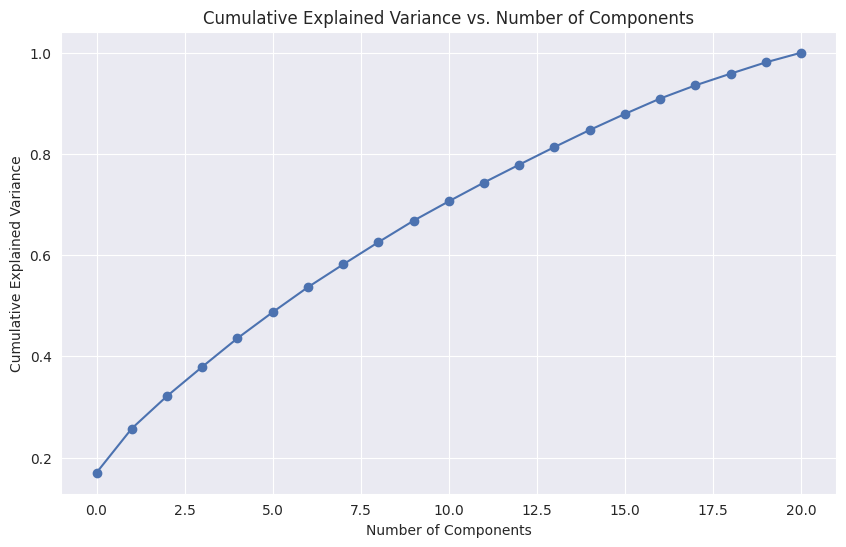

In [44]:
pca = PCA()
X_pca = pca.fit_transform(X)


explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.plot(cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.show()

*In the plot, you'll see how much variance is explained by each additional component. You can choose the number of components that retain the desired percentage of total variance. For example, if you want to retain 95% of the variance, find the point on the x-axis where the cumulative explained variance is close to 0.95.*

In [45]:
# base on the graph
best_n_components = 19

In [46]:
pca = PCA(n_components=best_n_components)
X_train_pca = pca.fit_transform(X)

# Create a list of column names for the factors DataFrame
column_names = ['PC' + str(i + 1) for i in range(best_n_components)]

# Create the DataFrame
factors_Df = pd.DataFrame(data=X_train_pca, columns=column_names)
factors_Df.index = X.index

In [47]:
factors_Df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
0,4.462229,-0.041653,0.065198,-1.534382,0.192835,-0.843574,-1.369736,0.872102,-0.399037,-0.072644,0.067544,-1.232132,0.033040,0.145382,-0.716768,0.713478,0.139854,-0.551842,-0.113681
1,0.579618,5.510040,1.005897,3.378593,-0.375956,1.651802,0.694956,2.123958,1.947823,-1.054054,-0.378739,-0.430684,-0.922869,-2.370064,0.862885,0.265289,-0.775098,0.110370,0.689491
2,4.736699,1.198474,-1.516878,-1.901066,0.665555,-0.674372,0.031485,-0.122053,0.793573,-2.239644,0.475407,0.791656,1.004020,0.194664,1.927642,-1.547364,0.793895,0.389288,-0.101512
3,-0.581129,-0.524248,-0.522768,0.434089,-2.141630,0.037332,-0.974881,-0.219053,-0.474417,0.568677,-0.833144,0.223000,0.369076,-0.069506,-0.306198,-0.134040,1.196724,0.182145,0.137154
4,-0.376785,-1.188959,-0.855193,0.516557,-1.638562,0.433696,-0.842396,-0.304310,0.656408,-0.917728,-0.298684,-0.228688,0.515714,0.222288,-0.008578,-0.028438,0.505922,-0.154302,-0.186199


In [48]:
print(pca.explained_variance_ratio_)
print()
print(pca.explained_variance_ratio_.cumsum())
print()
print(pca.explained_variance_ratio_.sum())

[0.17011509 0.08728065 0.06403327 0.05784277 0.05646393 0.05150771
 0.04941382 0.04498534 0.04393092 0.04252411 0.03826977 0.0371753
 0.03525531 0.03483312 0.03364478 0.03180467 0.03036493 0.02606754
 0.02308845]

[0.17011509 0.25739574 0.32142901 0.37927178 0.43573571 0.48724343
 0.53665725 0.58164258 0.6255735  0.66809762 0.70636739 0.74354268
 0.778798   0.81363111 0.8472759  0.87908057 0.9094455  0.93551304
 0.95860149]

0.9586014915758725


**Visualization of the explained variance**

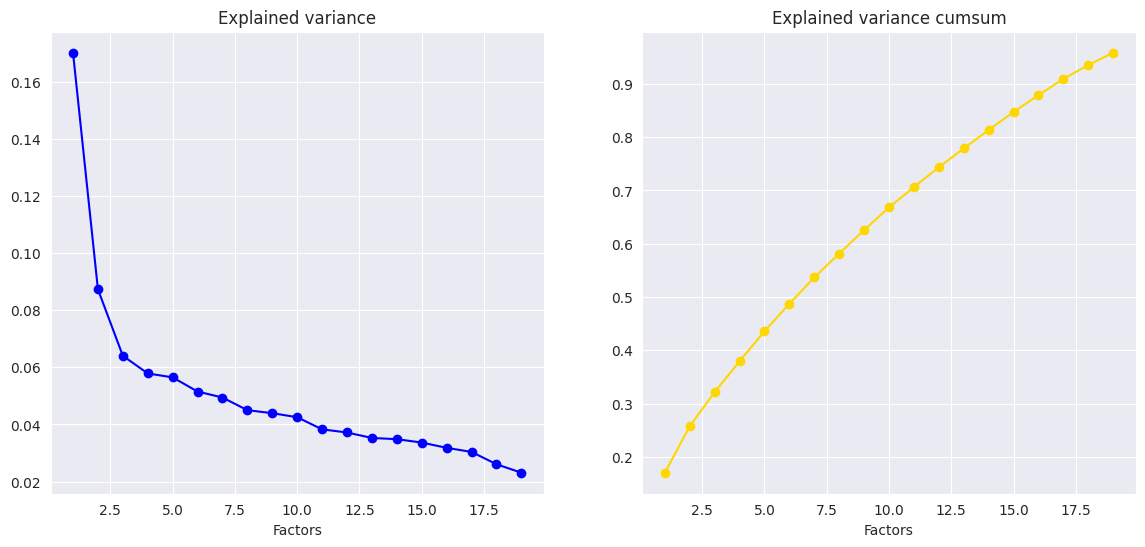

In [49]:
fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.plot(np.arange(1,20),pca.explained_variance_ratio_,color='b',marker='o')
ax2.plot(np.arange(1,20),np.cumsum(pca.explained_variance_ratio_),color='gold',marker='o')

ax1.set_xlabel('Factors')
ax1.set_title('Explained variance')
ax2.set_xlabel('Factors')
ax2.set_title('Explained variance cumsum')

plt.show()

### **Linear Discriminant Analysis (LDA)**

In [50]:
# Initialize LDA and transform X_train
lda = LinearDiscriminantAnalysis(n_components=None)
lda.fit(X, y)
X_train_lda = lda.transform(X)

# Initialize LDA and transform X_test
X_test_lda = lda.transform(X)

### **Predictive analysis**

#### **Principal Component Analysis (PCA)**

In [51]:
X_test_pca = pca.transform(X)

In [52]:
# Dictionary to store evaluation metrics and predictions
results = {}
pca_trained_classifiers= {}

# Loop through each classifier
for name, clf in classifiers_pca.items():
    cv_scores = cross_val_score(clf, X_test_pca, y, cv=kfold, scoring='accuracy')

    # Calculate the mean and standard deviation of the cross-validation scores
    mean_cv_score = np.mean(cv_scores)
    std_cv_score = np.std(cv_scores)

    results[name] = {
        "MeanCVAccuracy": mean_cv_score,
        "StdCVAccuracy": std_cv_score
    }


# Display the results
for name, metrics in results.items():
  print(f"--- {name} ---")
  print("Mean Cross-Validation Accuracy:", round(metrics["MeanCVAccuracy"], 3))
  print("Standard Deviation of Cross-Validation Accuracy:", round(metrics["StdCVAccuracy"], 3))
  print("\n")

--- Logistic Regression ---
Mean Cross-Validation Accuracy: 0.826
Standard Deviation of Cross-Validation Accuracy: 0.003


--- Random Forest ---
Mean Cross-Validation Accuracy: 0.822
Standard Deviation of Cross-Validation Accuracy: 0.005


--- K-Nearest Neighbors ---
Mean Cross-Validation Accuracy: 0.813
Standard Deviation of Cross-Validation Accuracy: 0.002


--- XGBoost ---
Mean Cross-Validation Accuracy: 0.815
Standard Deviation of Cross-Validation Accuracy: 0.007




#### **Linear Discriminant Analysis (LDA)**

In [53]:
# Initialize LDA and transform X_test
X_test_lda = lda.transform(X)

In [54]:
# Dictionary to store evaluation metrics and predictions
results = {}
lda_trained_classifiers= {}

# Loop through each classifier
for name, clf in classifiers_lda.items():
    cv_scores = cross_val_score(clf, X_test_lda, y, cv=kfold, scoring='accuracy')

    # Calculate the mean and standard deviation of the cross-validation scores
    mean_cv_score = np.mean(cv_scores)
    std_cv_score = np.std(cv_scores)

    results[name] = {
        "MeanCVAccuracy": mean_cv_score,
        "StdCVAccuracy": std_cv_score
    }

# Display the results
for name, metrics in results.items():
  print(f"--- {name} ---")
  print("Mean Cross-Validation Accuracy:", round(metrics["MeanCVAccuracy"], 3))
  print("Standard Deviation of Cross-Validation Accuracy:", round(metrics["StdCVAccuracy"], 3))
  print("\n")

--- Logistic Regression ---
Mean Cross-Validation Accuracy: 0.83
Standard Deviation of Cross-Validation Accuracy: 0.005


--- Random Forest ---
Mean Cross-Validation Accuracy: 0.805
Standard Deviation of Cross-Validation Accuracy: 0.004


--- K-Nearest Neighbors ---
Mean Cross-Validation Accuracy: 0.806
Standard Deviation of Cross-Validation Accuracy: 0.002


--- XGBoost ---
Mean Cross-Validation Accuracy: 0.819
Standard Deviation of Cross-Validation Accuracy: 0.002


